<h1>Problem Statement</h1> 
<p><i>For easy reference</i></p>
<p>Objective: develop a model that recommends the best financial advisors for individual customers through various techniques such as recommendation systems, supervised learning models, or unsupervised learning models. Used to assign the most suitable financial advisors to customers.</p>

In [35]:
import pandas as pd 
import os #for reading files
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
path = "./final_nus_datathon_dataset"

In [2]:
#!pip install pyarrow 
#^if you need to install pyarrow uncomment

<h3>Load Data</h3>

In [3]:
dfs = dict()
files = os.listdir(path)

print("Naming Convention:")
for i in range(len(files)):
    _,*filename,_,_ = files[i].split("_") 
    dfs[filename[0]] = pd.read_parquet(f"{path}/{files[i]}") 
    print("dfs[\"",filename[0],"\"]", ":", files[i])
               


Naming Convention:
dfs[" policy "] : nus_policy_info_df.parquet
dfs[" client "] : nus_client_info_df.parquet
dfs[" final "] : sample_final_modelling_df.parquet
dfs[" agent "] : nus_agent_info_df.parquet


<h3>Description of Dataset</h3>
<p>I just put the table from the Problem Statemen docs under each respective dataset for easy ref</p>

In [7]:
dfs["policy"].head()

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,prod_8,1,0,1,0,0,0,1,PG:0,AG05_35to39,TNR2_lt1yr
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,prod_8,1,0,1,0,0,0,1,PG:0,AG04_30to34,TNR4_4to8yr
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,prod_6,1,0,1,0,0,0,1,PG:0,AG07_45to49,TNR4_4to8yr


<table>
<thead>
<tr><th>Column Name</th><th>Purpose</th></tr>
</thead>
<tbody>
<tr><td>chdrnum</td><td> unique identifier for policy</td></tr>
<tr><td>agntnum</td><td> unique identifier for agent</td></tr>
<tr><td>secuityno</td><td> unique identifier for customer</td></tr>
<tr><td>occdate</td><td> inception date of policy</td></tr>
<tr><td>annual_premium</td><td> annual premium</td></tr>
<tr><td>product</td><td> product of the policy</td></tr>
<tr><td>product_grp </td><td> product group of the policy</td></tr>
<tr><td>flg_main </td><td> flag indicating the main policyholder</td></tr>
<tr><td>flg_inforce </td><td> flag indicating a policy that is in force</td></tr>
<tr><td>flg_cancel </td><td> flag indicating a policy that is cancelled</td></tr>
<tr><td>flg_expire </td><td> flag indicating a policy that expired</td></tr>
<tr><td>flg_converted </td><td> flag indicating a policy that is converted</td></tr>
<tr><td>cust_age_purchase_grp</td><td> customer's age group at purchase</td></tr>
<tr><td>cust_teure_at_purchase_grp</td><td> customer's tenure at purchase</td></tr>
</tbody>
</table>

In [8]:
dfs["agent"].head()

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,...,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,AIN:9513,32.0,M,M,15.0,21.0,1.004900e+04,1.0,0.814954,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,"[prod_2, prod_6]"
1,AIN:4310,40.0,M,M,18.0,396.0,1.971080e+05,0.6,0.083937,0.429293,...,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,[prod_6]
2,AIN:4302,39.0,F,M,40.0,853.0,5.106351e+05,0.3,0.017406,0.711606,...,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,[prod_4]
3,AIN:4996,57.0,F,D,41.0,554.0,3.514724e+05,0.3,0.003623,0.584838,...,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,"[prod_7, prod_9, prod_6, prod_0, prod_2]"
4,AIN:3457,38.0,M,M,62.0,1525.0,1.215380e+06,0.3,0.017523,0.640656,...,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,"[prod_6, prod_8]"


<table>
<thead>
<tr><th>Column Name</th><th>Purpose</th></tr>
</thead>
<tbody>
<tr><td>agent_age</td><td> agent’s age </td></tr>
<tr><td>agent_gender</td><td> agent’s gender </td></tr>
<tr><td>agent_marital</td><td> agent’s marital status </td></tr>
<tr><td>agent_tenure</td><td> agent’s tenure with the company </td></tr>
<tr><td>cnt_converted</td><td> count of policies converted by agent </td></tr>
<tr><td>annual_premium_cnvrt</td><td> total annual premium from converted policies by agent </td></tr>
<tr><td>pct_lapsed</td><td> percentage of policies that are currently lapsed </td></tr>
<tr><td>pct_cancel</td><td> percentage of policies that are currently cancelled </td></tr>
<tr><td>pct_inforce</td><td> percentage of policies that are currently in force </td></tr>
<tr><td>Percentage of customers’ gender handled by the agent</td><td> pct_sx0_unknown, pct_sx1_male, pct_sx2_female </td></tr>

<tr><td>Percentage of products sold by agent</td><td> pct_prod_0_cnvrt, pct_prod_1_cnvrt, ..., pct_prod_9_cnvrt</td></tr>

<tr><td>Percentage of customers’ age groups handled by the agent</td><td> pct_ag01_lt20, pct_ag02_20to24, ..., pct_ag10_60up </td></tr>
<tr><td>cluster</td><td> an old segment that the agent belongs to </td></tr>
<tr><td>agent_product_expertise</td><td> a list of products the agent is comfortable selling (based on feedback) </td></tr>
</tbody>
</table>


In [9]:
dfs["client"].head()

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80


<table>
<thead>
<tr><th>Column Name</th><th>Purpose</th></tr>
</thead>
<tbody>
<tr><td>secuityno</td><td> unique identifier for customer</td></tr>
<tr><td>cltsex</td><td> gender of customer</td></tr>
<tr><td>cltdob</td><td> date of birth of customer</td></tr>
<tr><td>marryd</td><td> marital status of customer</td></tr>
<tr><td>race_desc_map</td><td> race of customer</td></tr>
<tr><td>cltpcode</td><td> customer postal code</td></tr>
<tr><td>household_size</td><td> household size (based on postal code)</td></tr>
<tr><td>economic_status</td><td> economic status (based on postal code)</td></tr>
<tr><td>family_size</td><td> family size (based on postal code)</td></tr>
<tr><td>household_size_grp</td><td> discretized household size of customer</td></tr>
<tr><td>family_size_grp</td><td> discretized family size of customer</td></tr>
</tbody>
</table>

In [5]:
#removing NAs
for name in dfs:
    rows_before = len(dfs[name])
    dfs[name] = dfs[name].dropna() 
    rows_after = len(dfs[name])
    print(f"Dataset '{name}': Before {rows_before} After {rows_after}")

print("complete")

Dataset 'policy': Before 29503 After 29503
Dataset 'client': Before 20000 After 19647
Dataset 'final': Before 29503 After 29477
Dataset 'agent': Before 10129 After 10117
complete


<h3>Quesions</h3>
For <code>client</code> df what in the world are:
<ul> 
<li>family_size_grp (is the suff after the _ the average range?)</li> 
<li>hh size grp (lt? there's also non lt)</li> 
<li>whya are the "size" numbers so big lmao</li>
<li>there's also a discretized version of everything</li>
<li>should we use birth date to figure out their age to compare advisor age and client age better?</li>
</ul>

For <code>policy</code> df
<ul> 
<li>one of the (non-main)flag columns can be dropped right</li>
<li>what do we do with flag_main lol?</li>
</ul>

For <code>agent</code> df
<ul>
<li>Shld we reformat the pct stuff?</li>
<li>cluster?</li>



In [10]:
#Some Ideas: 

#should pct cancel for agent should be reversed for customers with high cancel?
#high expiry with high expiry? 
#correlation between age? 


In [32]:
dfs["client"].head(3)

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40


In [27]:
#Unique values per df
#Client 
print("Unique values per column in Client")
for col in ["race_desc_map","marryd","household_size_grp","family_size_grp"]:
    print(len(dfs["client"][col].unique()), f"for {col}")
    print(dfs["client"][col].unique())
    print("-"*6)


Unique values per column in Client
4 for race_desc_map
['Chinese' 'Others' 'Indian' 'Malay']
------
6 for marryd
['M' 'S' 'D' 'U' 'W' 'P']
------
6 for household_size_grp
['HH1_lt40' 'HH2_40to80' 'HH3_80to100' 'HH4_100to120' 'HH5_120up'
 'HH0_missing']
------
6 for family_size_grp
['FS3_40to60' 'FS5_80up' 'FS2_20to40' 'FS4_60to80' 'FS1_lt20'
 'FS0_missing']
------


In [41]:
#Correlation between discretised and non-" for client
dfs["client_encode_test"] = dfs["client"].copy()

for col in "household_size_grp","family_size_grp":
    encoder = LabelEncoder()
    dfs["client_encode_test"][f"{col}_encoded"] = encoder.fit_transform(dfs["client_encode_test"][col])

dfs["client_encode_test"].drop(columns=["family_size_grp","household_size_grp"], inplace=True)




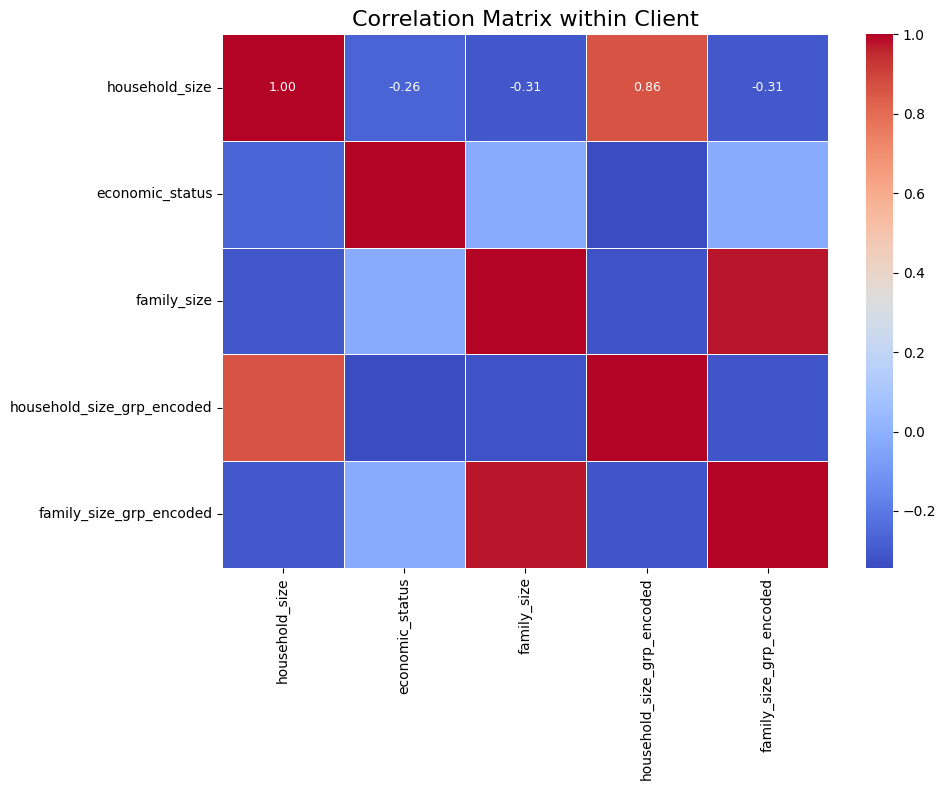

In [70]:
# dfs["client_encode_test"].iloc[:,6:].head()
correlation_matrix = dfs["client_encode_test"].iloc[:,6:].astype(float).corr()


# Assuming `correlation_matrix` contains the correlation values
plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(
    correlation_matrix,
    annot=True,  # Annotate all cells
    fmt=".2f",   # Format annotations to 2 decimal places
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 9}  # Adjust annotation font size
)
plt.title("Correlation Matrix within Client", fontsize=16)  # Adjust title size
plt.tight_layout()  # Avoid clipping
plt.show()
